In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [11]:
%%time
counts = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE124731/counts.txt', index_col=0, header=0, delimiter='\t').T
obs = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE124731/cell_info.txt',index_col=0, header=0,delimiter='\t')

CPU times: total: 2.06 s
Wall time: 2.06 s


In [12]:
counts

Gene,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000239906,ENSG00000241599,ENSG00000279928,ENSG00000279457,ENSG00000228463,...,ENSG00000277196,ENSG00000277630,ENSG00000278384,ENSG00000278633,ENSG00000276345,ENSG00000277856,ENSG00000275063,ENSG00000271254,ENSG00000277475,ENSG00000268674
AAACCTGGTGCTTCTC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGTCCACGTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGGGAGCAATATG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGGGAGTACGTAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGGGGTTTAAGCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGATGGGT,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTCAGTACCATCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTCAGTAGGGTAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTCAGTCCGAAGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
obs

,nUMI,nGene,percent_mito,donor,cell.type,umap1,umap2,innatenessScore,cluster
cell_id,,,,,,,,,
AAACCTGGTGCTTCTC,3620,1029,0.022652,IGPR998,CD4,-7.941781,1.922690,-4.435142,1
AAACCTGTCCACGTTC,1299,516,0.038491,IGPR998,CD4,-8.722025,2.119463,-3.218204,1
AAACGGGAGCAATATG,3472,964,0.031682,IGPR998,CD8,-8.197735,2.674847,-4.893667,1
AAACGGGAGTACGTAA,2178,785,0.038567,IGPR998,CD4,-8.410659,2.540959,-4.237528,1
AAACGGGGTTTAAGCC,3509,1173,0.034198,IGPR998,iNKT,-5.346104,-2.856669,-0.936668,2
...,...,...,...,...,...,...,...,...,...
TTTGTCACAGATGGGT,2482,852,0.020548,IGPR998,iNKT,-5.626755,-1.677042,-0.953587,2
TTTGTCAGTACCATCA,3155,1205,0.043740,IGPR999,Vd2,1.895277,0.456775,0.500433,3
TTTGTCAGTAGGGTAC,3162,949,0.037951,IGPR999,CD8,-8.165998,3.028647,-3.030937,1


In [14]:
adata = sc.AnnData(X=counts, obs=obs)

C:\Users\23247\AppData\Local\Temp\ipykernel_16652\1923552843.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts, obs=obs)


In [16]:
adata.obs['cell.type'].value_counts()

MAIT    382
iNKT    325
CD8     310
NK      309
Vd1     284
CD4     222
Vd2     204
Name: cell.type, dtype: int64

In [17]:
adata.obs['label']=adata.obs['cell.type']

In [18]:
adata.obs

,nUMI,nGene,percent_mito,donor,cell.type,umap1,umap2,innatenessScore,cluster,label
cell_id,,,,,,,,,,
AAACCTGGTGCTTCTC,3620,1029,0.022652,IGPR998,CD4,-7.941781,1.922690,-4.435142,1,CD4
AAACCTGTCCACGTTC,1299,516,0.038491,IGPR998,CD4,-8.722025,2.119463,-3.218204,1,CD4
AAACGGGAGCAATATG,3472,964,0.031682,IGPR998,CD8,-8.197735,2.674847,-4.893667,1,CD8
AAACGGGAGTACGTAA,2178,785,0.038567,IGPR998,CD4,-8.410659,2.540959,-4.237528,1,CD4
AAACGGGGTTTAAGCC,3509,1173,0.034198,IGPR998,iNKT,-5.346104,-2.856669,-0.936668,2,iNKT
...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGATGGGT,2482,852,0.020548,IGPR998,iNKT,-5.626755,-1.677042,-0.953587,2,iNKT
TTTGTCAGTACCATCA,3155,1205,0.043740,IGPR999,Vd2,1.895277,0.456775,0.500433,3,Vd2
TTTGTCAGTAGGGTAC,3162,949,0.037951,IGPR999,CD8,-8.165998,3.028647,-3.030937,1,CD8


In [19]:
adata.X = sparse.csr_matrix(adata.X)

In [20]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [21]:
adata = adata[adata.obs.total_counts < 75000, :]

In [22]:
adata

View of AnnData object with n_obs × n_vars = 2036 × 33694
    obs: 'nUMI', 'nGene', 'percent_mito', 'donor', 'cell.type', 'umap1', 'umap2', 'innatenessScore', 'cluster', 'label', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [23]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [24]:
adata

AnnData object with n_obs × n_vars = 2036 × 13368
    obs: 'nUMI', 'nGene', 'percent_mito', 'donor', 'cell.type', 'umap1', 'umap2', 'innatenessScore', 'cluster', 'label', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

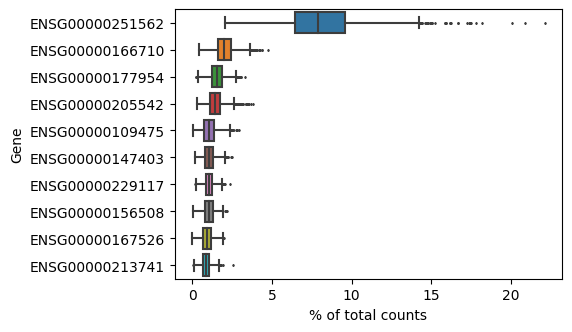

In [25]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [26]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

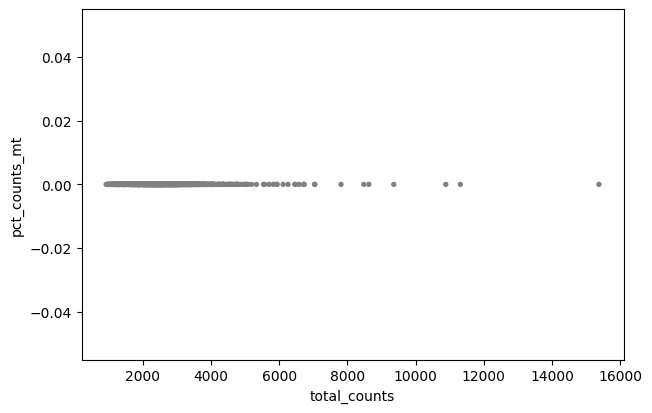

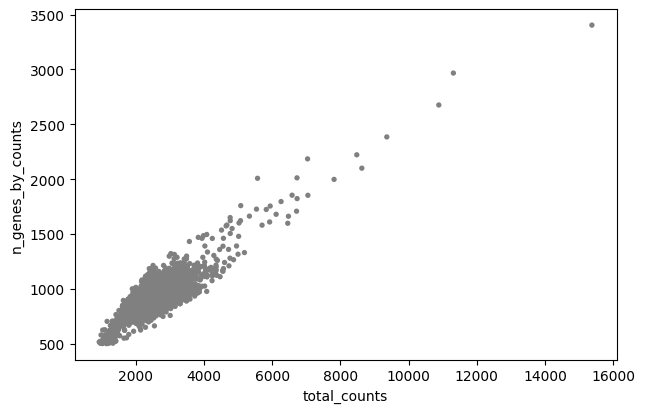

In [27]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [28]:
adata.raw = adata

In [29]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/ITC/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/ITC/processed')

adata.write('D:/MyData/scEDGE_Generation/data/ITC/processed/ITC.h5ad')

In [30]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var 

In [31]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/ITC/processed/ITC_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/ITC/processed/ITC_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/ITC/processed/ITC_expression_matrix.mtx', expression_matrix)

## Top2000

In [32]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

In [33]:
adata_top = adata[:, adata.var.highly_variable]

In [34]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed/ITC_top2000.h5ad')

In [35]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [36]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed/ITC_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed/ITC_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/ITC_top2000/processed/ITC_expression_matrix_top2000.mtx', expression_matrix_top)